<a href="https://colab.research.google.com/github/RicardoMourao-py/CliqueMax/blob/main/results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clique Máximo em um Grafo

- Aluno: Ricardo Mourão Rodrigues Filho

## Setup

In [ ]:
!git clone https://github.com/RicardoMourao-py/CliqueMax
%cd "CliqueMax"
!pip install -r requirements.txt

## Bibliotecas

In [25]:
import os
import subprocess
import time
from datetime import datetime
import matplotlib.pyplot as plt

## Permissão para Compilados

In [ ]:
!chmod +x compilacoes/heuristica/clique_heuristica_20
!chmod +x compilacoes/heuristica/clique_heuristica_40
!chmod +x compilacoes/heuristica/clique_heuristica_60
!chmod +x compilacoes/heuristica/clique_heuristica_80
!chmod +x compilacoes/heuristica/clique_heuristica_100
!chmod +x compilacoes/heuristica/clique_heuristica_120

In [ ]:
!chmod +x compilacoes/exaustiva/clique_exaustivo_20
!chmod +x compilacoes/exaustiva/clique_exaustivo_40
!chmod +x compilacoes/exaustiva/clique_exaustivo_60
!chmod +x compilacoes/exaustiva/clique_exaustivo_80
!chmod +x compilacoes/exaustiva/clique_exaustivo_100
!chmod +x compilacoes/exaustiva/clique_exaustivo_120

In [ ]:
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_20
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_40
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_60
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_80
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_100
!chmod +x compilacoes/exaustiva-omp/clique_exaustivo_omp_120

## Tempo de Execução vs Tamnaho Grafo

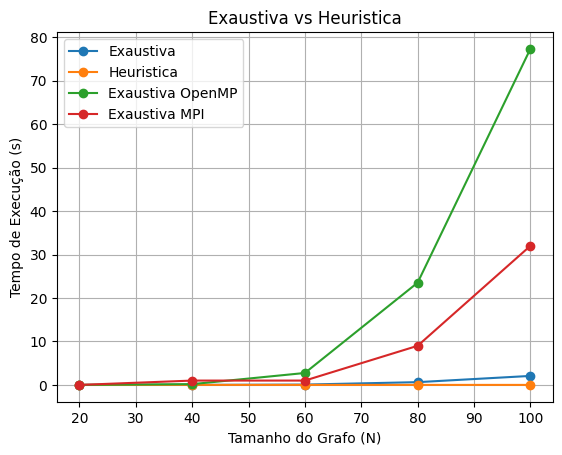

In [37]:
# arquivos executaveis
compilados_exaustiva = sorted(map(lambda x: os.path.join("compilacoes/exaustiva/", x), os.listdir("compilacoes/exaustiva/")), key=lambda x: int(x.split("_")[-1]))
compilados_heurisitca = sorted(map(lambda x: os.path.join("compilacoes/heuristica/", x), os.listdir("compilacoes/heuristica/")), key=lambda x: int(x.split("_")[-1]))
compilados_exaustiva_omp = sorted(map(lambda x: os.path.join("compilacoes/exaustiva-omp/", x), os.listdir("compilacoes/exaustiva-omp/")), key=lambda x: int(x.split("_")[-1]))
output_exaustiva_mpi = sorted(map(lambda x: os.path.join("out_mpi/", x), os.listdir("out_mpi/")), key=lambda x: int(x.split(".out")[0].split("_")[-1]))

tempos_exaustiva = []
tempos_heuristica = []
tempos_exaustiva_omp  = []
tempos_exaustiva_mpi = []

for i in output_exaustiva_mpi[:-1]:
  with open(i, 'r') as file:
      content = file.read()
      out = content.split('\n')
      time1 = datetime.strptime(out[0], '%H:%M:%S')
      time2 = datetime.strptime(out[2], '%H:%M:%S')
      delta = (time2 - time1).total_seconds()
      tempos_exaustiva_mpi.append(delta)

size_graph = list(range(20,120,20))

for i in range(len(size_graph)):
    comando = [compilados_exaustiva[i]]
    inicio = time.time()
    subprocess.run(comando, text=True, capture_output=True)
    fim = time.time()
    tempo_execucao_exaustiva = fim - inicio
    tempos_exaustiva.append(tempo_execucao_exaustiva)

    comando = [compilados_heurisitca[i]]
    inicio = time.time()
    subprocess.run(comando, text=True, capture_output=True)
    fim = time.time()
    tempo_execucao_heuristica = fim - inicio
    tempos_heuristica.append(tempo_execucao_heuristica)

    comando = [compilados_exaustiva_omp[i]]
    inicio = time.time()
    subprocess.run(comando, text=True, capture_output=True)
    fim = time.time()
    tempo_execucao_exaustiva_omp = fim - inicio
    tempos_exaustiva_omp.append(tempo_execucao_exaustiva_omp)


# Crie o gráfico
plt.plot(size_graph, tempos_exaustiva, label="Exaustiva", marker='o')
plt.plot(size_graph, tempos_heuristica, label="Heuristica", marker='o')
plt.plot(size_graph, tempos_exaustiva_omp, label="Exaustiva OpenMP", marker='o')
plt.plot(size_graph, tempos_exaustiva_mpi, label="Exaustiva MPI", marker='o')
plt.xlabel("Tamanho do Grafo (N)")
plt.ylabel("Tempo de Execução (s)")
plt.legend()
plt.title("Exaustiva vs Heuristica")

# Exiba o gráfico
plt.grid(True)
plt.show()

## Executando todas Implementações

In [47]:
print("--------------------- Exaustiva -------------------")
!compilacoes/exaustiva/clique_exaustivo_60
print("--------------------- Heuristica -------------------")
!compilacoes/heuristica/clique_heuristica_60
print("--------------------- Exaustiva OpenMP -------------------")
!compilacoes/exaustiva-omp/clique_exaustivo_omp_60
print("--------------------- Exaustiva MPI -------------------")
with open('out_mpi/slurm_60.out', 'r') as file:
  content = file.read()
  print(content.split('\n')[1])

--------------------- Exaustiva -------------------
Clique máxima encontrada: [9, 11, 12, 13, 20, 35, 46, 51, 53, 55, 59, 60]
--------------------- Heuristica -------------------
Clique máxima encontrada: [9, 11, 12, 14, 18, 20, 35, 43, 51, 59, 60]
--------------------- Exaustiva OpenMP -------------------
Clique máxima encontrada: [9, 11, 12, 13, 20, 35, 46, 51, 53, 55, 59, 60]
--------------------- Exaustiva MPI -------------------
Clique máxima encontrada: [9, 11, 12, 13, 20, 35, 46, 51, 53, 55, 59, 60]


## Gera Grafo

In [38]:
!python3 utils/gera_grafo.py

Grafo densamente conectado gerado e salvo em 'grafo.txt'.


## Abordagem Exaustiva

In [39]:
!g++ -Wall -O3 -g src/clique_exaustivo.cpp -o clique_exaustivo

In [40]:
!./clique_exaustivo

Clique máxima encontrada: [3, 4, 18, 20, 26, 29, 39, 44, 46, 48, 50]


 ## Abordagem Heurística

In [41]:
!g++ -Wall -O3 -g src/clique_heuristica.cpp -o clique_heuristica

In [42]:
!./clique_heuristica

Clique máxima encontrada: [11, 18, 26, 27, 30, 34, 37, 41, 44, 48, 49]


## Pseudo-Código que otimiza a tarefa exaustiva

Certamente, podemos adicionar uma heurística para otimizar o algoritmo exaustivo. Além disso, podemos implementar uma poda para evitar o cálculo de ramos que sabemos antecipadamente que não levarão a uma solução melhor. Uma abordagem comum é usar a ideia de limites superiores (upper bounds) e limites inferiores (lower bounds).

Aqui está um pseudocódigo com uma heurística de ordenação por grau e uma poda usando limites superiores e inferiores:

```
Função EncontrarCliqueMaxima(grafo, numVertices)
    cliqueMaxima = ListaVazia()
    candidatos = ListaDeNós()  # Inicialmente, todos os nós são candidatos

    Para cada i de 0 até numVertices - 1 Faça
        Adicione (i, Grau(i)) à lista de candidatos

    Ordenar candidatos por Grau em ordem decrescente

    Enquanto candidatos não estiver vazia Faça
        (v, grau) = Último elemento de candidatos
        Remova o último elemento de candidatos

        Se (cliqueMaxima.tamanho + grau) <= cliqueMaximaAtual.tamanho Então
            # Podar se a soma do tamanho da clique atual e do grau de v for menor ou igual ao tamanho da clique máxima conhecida
            Continue
        Fim Se

        podeAdicionar = Verdadeiro

        Para cada u em cliqueMaxima Faça
            Se grafo[u][v] == 0 Então
                podeAdicionar = Falso
                Pare o loop
            Fim Se
        Fim Para

        Se podeAdicionar for Verdadeiro Então
            Adicione v a cliqueMaxima
            novosCandidatos = ListaDeNós()

            Para cada u, grauU em candidatos Faça
                Se grauU >= grau e grafo[u][v] == 1 Então
                    Adicione (u, grauU) a novosCandidatos
                Fim Se
            Fim Para

            candidatos = novosCandidatos
        Fim Se
    Fim Enquanto

    Retorne cliqueMaxima
Fim Função
```

Neste pseudocódigo, a poda é feita comparando a soma do tamanho da clique atual (cliqueMaxima.tamanho) com o grau do nó candidato (grau). Se essa soma for menor ou igual ao tamanho da clique máxima conhecida (cliqueMaximaAtual.tamanho), sabemos que adicionar o nó candidato não levará a uma clique maior, então podemos pular essa iteração.

## Threads OpenMP

In [43]:
!g++ -Wall -O3 -g -fopenmp src/clique_exaustivo_omp.cpp -o clique_exaustivo_omp

In [44]:
!./clique_exaustivo_omp

Clique máxima encontrada: [3, 4, 18, 20, 26, 29, 39, 44, 46, 48, 50]


## Verifica Clique Máximo Encontrado

In [45]:
!python3 utils/clique_correto.py

Clique máxima encontrada: [18, 20, 22, 26, 27, 30, 32, 37, 41, 43, 49]


## Iterações

- Diferenciar SpeedUps
- Comentários código e explicações dos seus usos